# Purifying an image

## Getting our hands on some data...

In [1]:
from os.path import join, dirname
from purify import __file__ as datadir, read_visibility, read_image, SensingOperator


datafile = "at166B.3C129.c0.vis"

visibility = read_visibility(datafile, visflag="vis")


from numpy import pi, sqrt
dx = 0.3 #resolution in arcsec 
dx = dx /60.0/60.0/180.0 * pi
umax = 1.0/(2.0*dx)
uscale = 2.0*pi/umax
visibility['u'] = visibility['u']*uscale
visibility['v'] = visibility['v']*uscale
visibility['w'] = 1e0 / visibility['noise'].real

visibility

,noise,u,v,y,w
0,(0.0166656493909+0.0166656493909j),-0.164461,0.002128,(0.0326793789864+0.00202432763763j),60.003662
1,(0.0163504350141+0.0163504350141j),-0.301450,0.003882,(0.0166847589426-0.0111475638114j),61.160452
2,(0.0171429802896+0.0171429802896j),-0.483999,0.006244,(0.00724145211279+0.0120525922393j),58.332914
3,(0.0154192881211+0.0154192881211j),0.640171,-0.008267,(-0.00306939519942+0.0155271231197j),64.853837
4,(0.0136858842456+0.0136858842456j),0.406197,-0.005399,(0.00116275931941-0.0198489055037j),73.067986
5,(0.0148419726162+0.0148419726162j),0.897563,-0.011511,(0.0184389371425-0.00340596167371j),67.376489
6,(0.0150252348395+0.0150252348395j),0.190470,-0.002514,(0.0266131358221+0.00319175096229j),66.554700
7,(0.0157860108732+0.0157860108732j),-0.758224,0.604548,(0.0142418839969-0.00951102655381j),63.347226
8,(0.0156658431883+0.0156658431883j),-0.682604,0.414439,(-0.00442925468087-0.00850892905146j),63.833142
9,(0.0153163871224+0.0153163871224j),-0.567335,0.130818,(-0.000490562058985-0.00291722151451j),65.289549


## Purifying an image

*Purify*'s main functionality can be accesses via the SDMM object. This object accepts a fair number of parameter affecting the actual objective function that is optimized, the precision of the optimization, the number of wavelets basis sets, etc... The SDMM class is accessible directly within the purify namespace.

In [2]:
from purify import SDMM

wavelets = ['DB%i' % i for i in range(1, 9)] + ['Dirac']
sdmm = SDMM(image_size=(256, 256), nblevels=4, wavelets=wavelets)

Once instantiated, the function is called on a given set of visibilities. The set of visibilities can be anything, from a tuple ``(u, v, y)`` to a [pandas](http://pandas.pydata.org/) dataframe with the appropriate columns (as here).


In [4]:
result = sdmm(visibility, max_iter=1, scale=1e0/sqrt(2.25968918e+01), oversampling=(1, 1))

(0.0068746317881+0.000425849803724j) (0.0038789263245-0.000716498694816j)
(9, 256, 256) (140918,)
1.0 1.0 1.0 1.0
60.0036624165 61.1604522531 65.7330661335 67.004834116


We have not run the algorithm very long... But then, we are also using data that is actually already clean. It makes showcasing easier :)
In any case, the result can be plotted using, for instance, matplotlib.

/Users/mdavezac/workspaces/purify/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


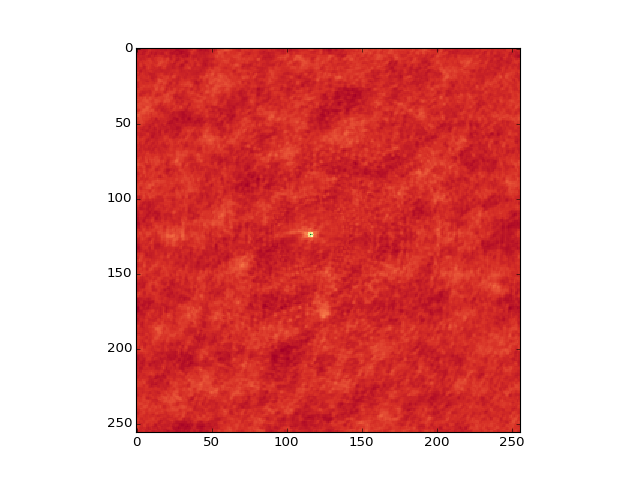

In [5]:
# tell ipython to use matplotlib widgets for graphs
%matplotlib notebook
import matplotlib.pyplot as plt
# now plot real-part as image
plt.imshow(result.real, cmap=plt.cm.RdYlGn, interpolation='none')
